# IE6400 Foundations for Data Analytics Engineering
# Fall 2023
### Module 2: Joint, Marginal and Conditional Probability
### - STUDENT VERSION -

#### Exercise 1 Understanding Joint Probability through Dice Rolling Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(0)  # for reproducibility
n_rolls = 10000

# Simulating the rolls
rolls_A = np.random.randint(1, 7, n_rolls)
rolls_B = np.random.randint(1, 7, n_rolls)


In [3]:
# Identifying the successful events
success_events = np.logical_and(rolls_A == 2, rolls_B == 4)

# Calculating the joint probability
joint_prob = np.sum(success_events) / n_rolls

# Print the result
print(f"Joint Probability of event A (rolling a 2) and event B (rolling a 4) is : {joint_prob}")

Joint Probability of event A (rolling a 2) and event B (rolling a 4) is : 0.028


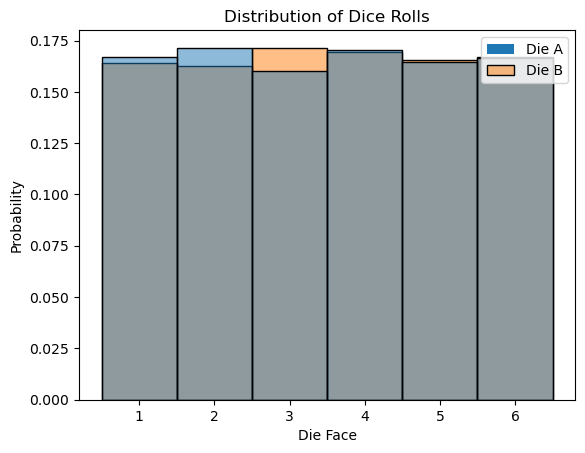

In [4]:
# Creating a DataFrame for visualization
import pandas as pd
df = pd.DataFrame({'Die A': rolls_A, 'Die B': rolls_B})

# Plotting
sns.histplot(df, bins=np.arange(1, 9), discrete=True, stat='probability', common_norm=False)
plt.title('Distribution of Dice Rolls')
plt.xlabel('Die Face')
plt.ylabel('Probability')
plt.legend(['Die A', 'Die B'])
plt.show()


#### Exercise 2 Understanding Joint and Marginal Probabilities from Customer Complaints

In [5]:
import matplotlib.pyplot as plt

In [6]:
# Given data
total_complaints = 100
late_delivery_complaints = 80
poor_quality_complaints = 60

# Using Inclusion-Exclusion principle to find complaints about both
both_complaints = late_delivery_complaints + poor_quality_complaints - total_complaints

# a) Probability of both complaints
prob_both = both_complaints / total_complaints

# b) Probability of only late delivery
prob_only_late_delivery = (late_delivery_complaints - both_complaints) / total_complaints

#prob_both, prob_only_late_delivery
print('a. Probability that a customer complaint about both product quality and late delivery is %1.4f' % prob_both)
print('b. probability that a complaint will be only about late delivery. is %1.4f' % prob_only_late_delivery)

a. Probability that a customer complaint about both product quality and late delivery is 0.4000
b. probability that a complaint will be only about late delivery. is 0.4000


In [7]:
!pip install matplotlib_venn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib_venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=32999 sha256=155d0774771f81a2c99f395c468f14be8578424aaad4042c195e81228b0c6de7
  Stored in directory: /Users/skyleraliya/Library/Caches/pip/wheels/25/de/d4/29dfc5d4520b956df7bc54a8464ad053042918bc525e88bf66
Successfully built matplotlib_venn


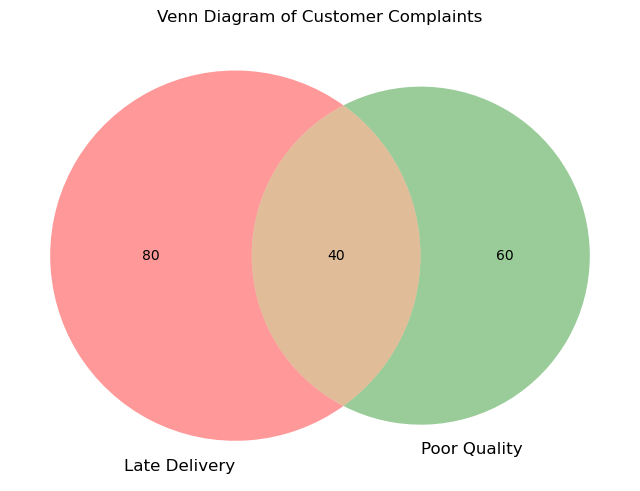

In [8]:
from matplotlib_venn import venn2

# Plotting Venn diagram
plt.figure(figsize=(8, 8))
venn2(subsets=(late_delivery_complaints, poor_quality_complaints, both_complaints),
      set_labels=('Late Delivery', 'Poor Quality'))
plt.title('Venn Diagram of Customer Complaints')
plt.show()


#### Exercise 3 Understanding Conditional Probability with a Deck of Cards

In [9]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# Define the deck of cards
deck = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King'] * 4  # Four suits

# Probability of drawing an Ace on the first draw
prob_Ace_first_draw = deck.count('Ace') / len(deck)

# Probability of drawing a King on the second draw after drawing an Ace
deck.remove('Ace')  # Remove one Ace
prob_King_second_draw = deck.count('King') / (len(deck) - 1)

# Calculate conditional probability
conditional_probability = (prob_Ace_first_draw * prob_King_second_draw) / prob_Ace_first_draw

prob_Ace_first_draw, conditional_probability

(0.07692307692307693, 0.08)

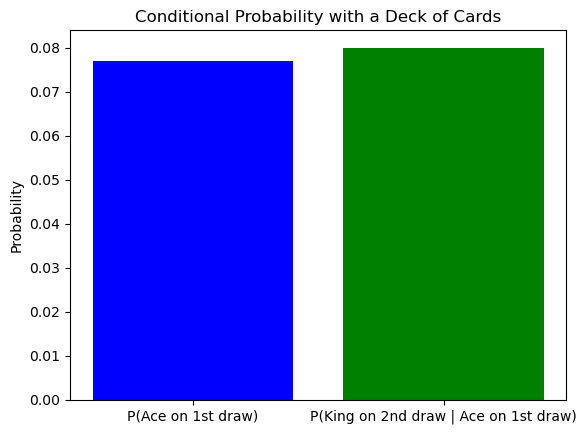

Conditional Probability (P(King Second | Ace First)): 0.08


In [11]:
# Plotting the probabilities
labels = ['P(Ace on 1st draw)', 'P(King on 2nd draw | Ace on 1st draw)']
values = [prob_Ace_first_draw, prob_King_second_draw]

plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('Probability')
plt.title('Conditional Probability with a Deck of Cards')
plt.show()
print(f"Conditional Probability (P(King Second | Ace First)): {conditional_probability}")


#### Exercise 5 Understanding the Probability of Consecutive Events with Dice Rolling

In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
np.random.seed(0)  # for reproducibility
n_trials = 10000

# Simulating the rolls
rolls = np.random.randint(1, 7, n_trials)

# Checking for consecutive "6"s
consecutive_sixes = np.sum((rolls[:-1] == 6) & (rolls[1:] == 6))

# Probability of getting two consecutive "6"s
prob_consecutive_sixes = consecutive_sixes / (n_trials - 1)
prob_consecutive_sixes


0.028502850285028504

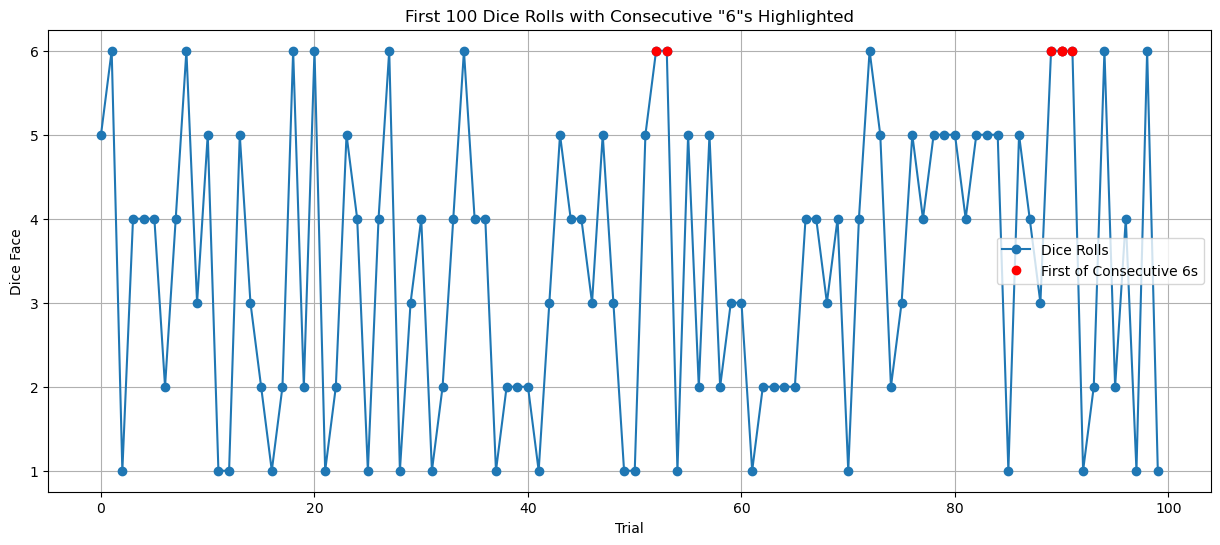

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(rolls[:100], 'o-', label='Dice Rolls')  # Plotting the first 100 rolls for clarity

# Identifying positions where a "6" is followed by another "6"
positions_of_consecutive_sixes = np.where((rolls[:99] == 6) & (rolls[1:100] == 6))[0]
plt.plot(positions_of_consecutive_sixes, rolls[positions_of_consecutive_sixes], 'ro', label='First of Consecutive 6s')
plt.plot(positions_of_consecutive_sixes + 1, rolls[positions_of_consecutive_sixes + 1], 'ro')  # Second of Consecutive 6s

plt.xlabel('Trial')
plt.ylabel('Dice Face')
plt.title('First 100 Dice Rolls with Consecutive "6"s Highlighted')
plt.legend()
plt.grid(True)
plt.show()


#### Exercise 6 Understanding Conditional Probability with Sports Preferences and Gender

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [16]:
# Create pandas DataFrame with raw data
df = pd.DataFrame({'gender': np.repeat(np.array(['Male', 'Female']), 150),
                   'sport': np.repeat(np.array(['Baseball', 'Basketball', 'Football',
                                                'Soccer', 'Baseball', 'Basketball',
                                                'Football', 'Soccer']),
                                      (34, 40, 58, 18, 34, 52, 20, 44))})
df.head()


,gender,sport
0,Male,Baseball
1,Male,Baseball
2,Male,Baseball
3,Male,Baseball
4,Male,Baseball


In [17]:
# Probability of preferring basketball
prob_basketball = len(df[df['sport'] == 'Basketball']) / len(df)

# Conditional probability of preferring basketball given male
prob_basketball_given_male = len(df[(df['sport'] == 'Basketball') & (df['gender'] == 'Male')]) / len(df[df['gender'] == 'Male'])

# Conditional probability of being female given preferring basketball
prob_female_given_basketball = len(df[(df['sport'] == 'Basketball') & (df['gender'] == 'Female')]) / len(df[df['sport'] == 'Basketball'])

prob_basketball, prob_basketball_given_male, prob_female_given_basketball


(0.30666666666666664, 0.26666666666666666, 0.5652173913043478)

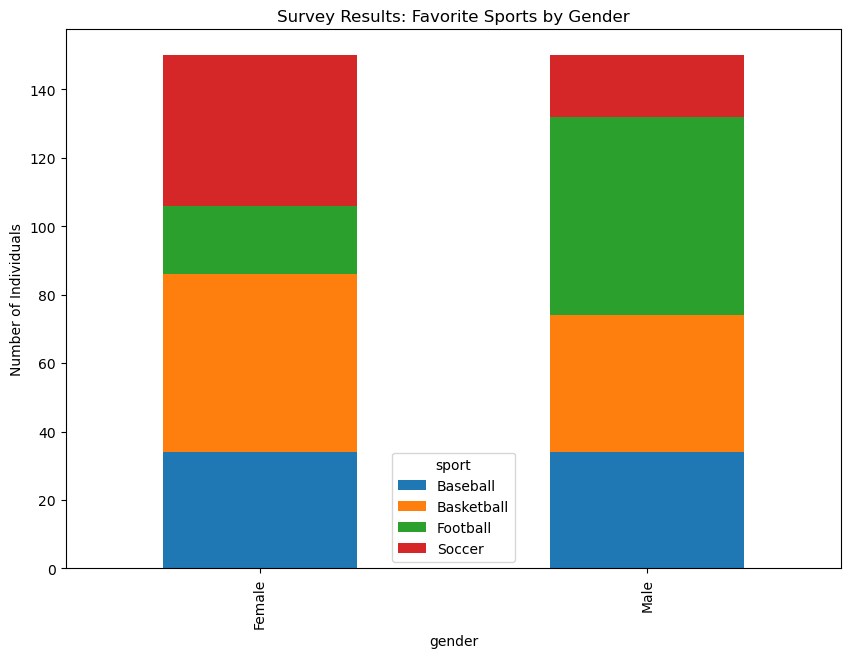

In [18]:
# Plotting the survey results based on gender and sport preference
pivot_count = df.groupby(['gender', 'sport']).size().unstack()
pivot_count.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Survey Results: Favorite Sports by Gender')
plt.ylabel('Number of Individuals')
plt.show()


#### Exercise 7 Understanding Marginal Probability with Dice Rolling

In [19]:
import numpy as np
import matplotlib.pyplot as plt


In [20]:
np.random.seed(0)  # for reproducibility
n_trials = 1000

# Simulating the rolls
rolls = np.random.randint(1, 7, n_trials)

# Marginal probability of rolling a "3"
prob_rolling_3 = np.sum(rolls == 3) / n_trials
prob_rolling_3


0.157

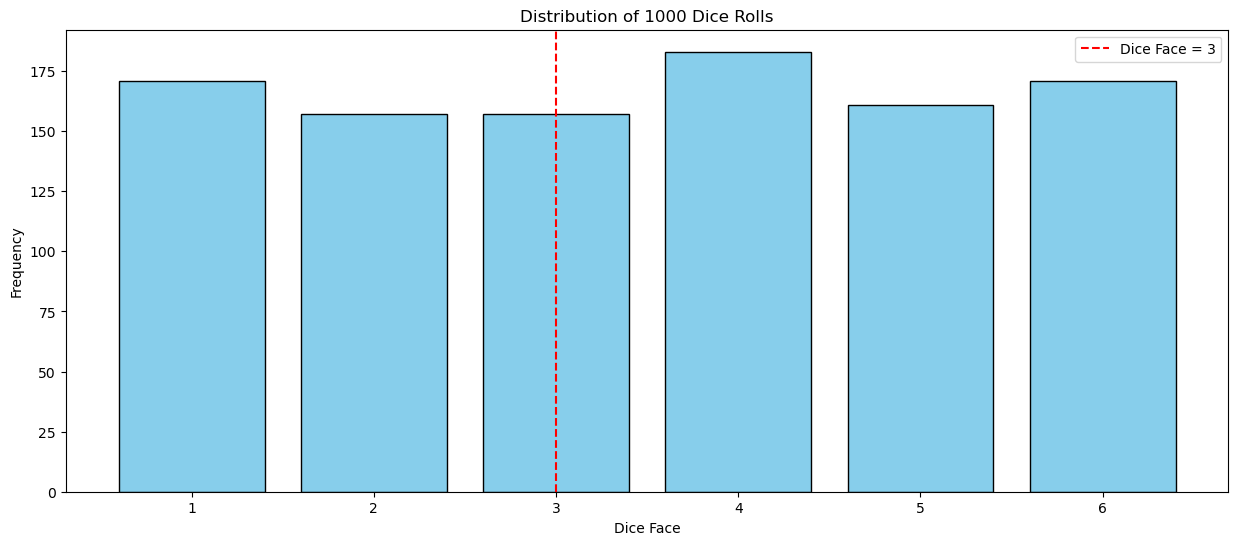

Marginal Probability (P(3)): 0.157


In [21]:
# Plotting the outcomes of the dice rolls
plt.figure(figsize=(15, 6))
plt.hist(rolls, bins=np.arange(1, 8) - 0.5, rwidth=0.8, align='mid', color='skyblue', edgecolor='black')
plt.xlabel('Dice Face')
plt.ylabel('Frequency')
plt.title('Distribution of 1000 Dice Rolls')
plt.xticks(np.arange(1, 7))
plt.axvline(x=3, color='red', linestyle='dashed', label='Dice Face = 3')
plt.legend()
plt.show()

print(f"Marginal Probability (P(3)): {prob_rolling_3}")

#### Exercise 8 Understanding Probability Mass Function (PMF) with Dice Rolling

In [22]:
import numpy as np
import matplotlib.pyplot as plt


In [23]:
# Possible outcomes of the die
outcomes = np.arange(1, 7)

# PMF for each outcome
pmf = [1/6 for _ in outcomes]
pmf


[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

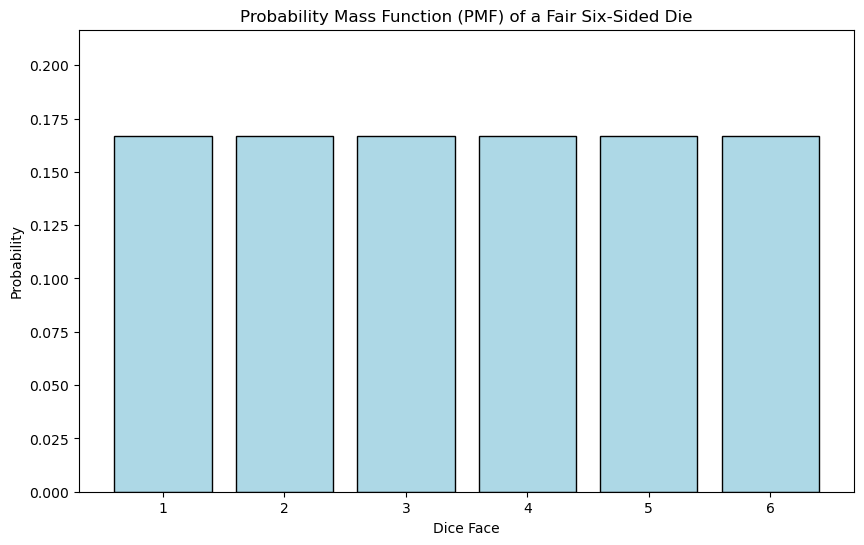

In [24]:
# Plotting the PMF
plt.figure(figsize=(10, 6))
plt.bar(outcomes, pmf, color='lightblue', edgecolor='black')
plt.xlabel('Dice Face')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) of a Fair Six-Sided Die')
plt.xticks(outcomes)
plt.ylim(0, 1/6 + 0.05)  # Adjusting y-axis to better visualize the probabilities
plt.show()


#### Exercise 9 Understanding Probability Density Function (PDF) with the Standard Normal Distribution

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [26]:
# Parameters for the normal distribution
mean = 175
std_dev = 7

# Generating a range of height values
heights = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Computing the PDF for each height value
pdf_values = norm.pdf(heights, mean, std_dev)


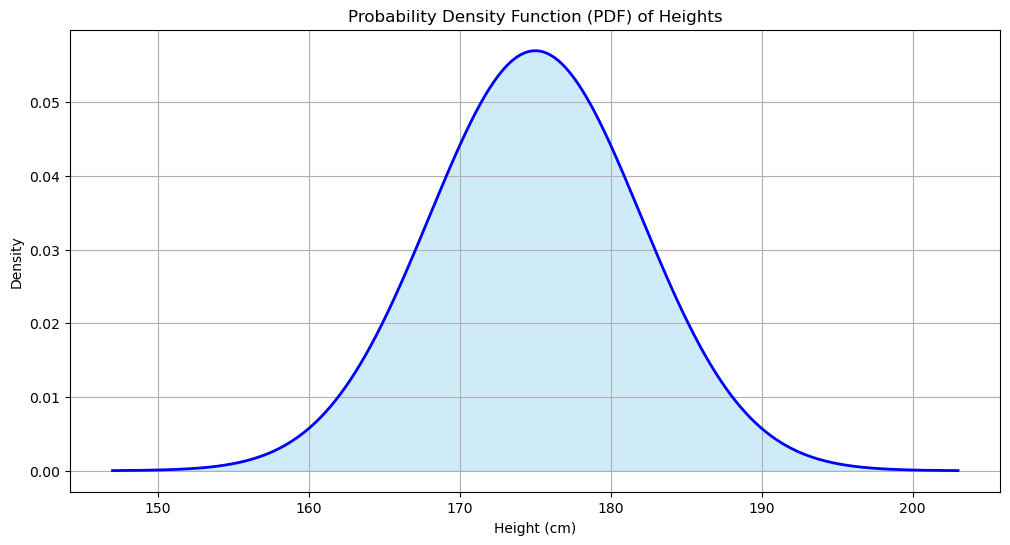

In [27]:
# Plotting the PDF
plt.figure(figsize=(12, 6))
plt.plot(heights, pdf_values, color='blue', linewidth=2)
plt.fill_between(heights, pdf_values, color='skyblue', alpha=0.4)
plt.title('Probability Density Function (PDF) of Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


#### Exercise 10 Understanding Cumulative Distribution Function (CDF) with the Standard Normal Distribution

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [29]:
# Parameters for the normal distribution
mean = 70
std_dev = 10

# Generating a range of score values
scores = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Computing the CDF for each score value
cdf_values = norm.cdf(scores, mean, std_dev)


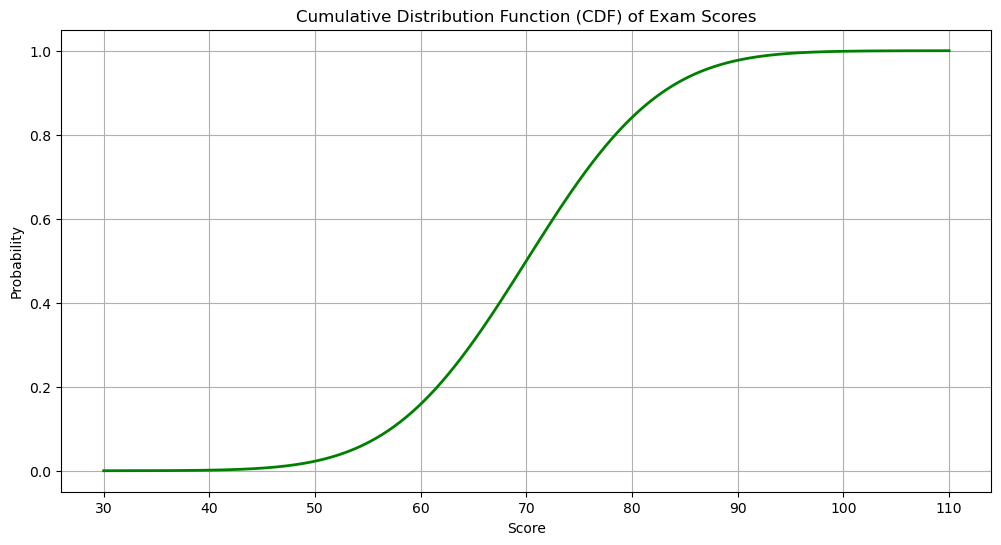

In [30]:
# Plotting the CDF
plt.figure(figsize=(12, 6))
plt.plot(scores, cdf_values, color='green', linewidth=2)
plt.title('Cumulative Distribution Function (CDF) of Exam Scores')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


#### Exercise 11 Understanding Marginal Probability Distribution

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
# Sample data representing joint distribution
data = {
    'Product': ['Product A', 'Product A', 'Product B', 'Product B'],
    'Age Group': ['Young', 'Old', 'Young', 'Old'],
    'Count': [120, 80, 100, 150]
}

df = pd.DataFrame(data)
df


,Product,Age Group,Count
0,Product A,Young,120
1,Product A,Old,80
2,Product B,Young,100
3,Product B,Old,150


In [33]:
# Marginal probability for each product
marginal_product = df.groupby('Product')['Count'].sum() / df['Count'].sum()

# Marginal probability for each age group
marginal_age = df.groupby('Age Group')['Count'].sum() / df['Count'].sum()

marginal_product, marginal_age


(Product
 Product A    0.444444
 Product B    0.555556
 Name: Count, dtype: float64,
 Age Group
 Old      0.511111
 Young    0.488889
 Name: Count, dtype: float64)

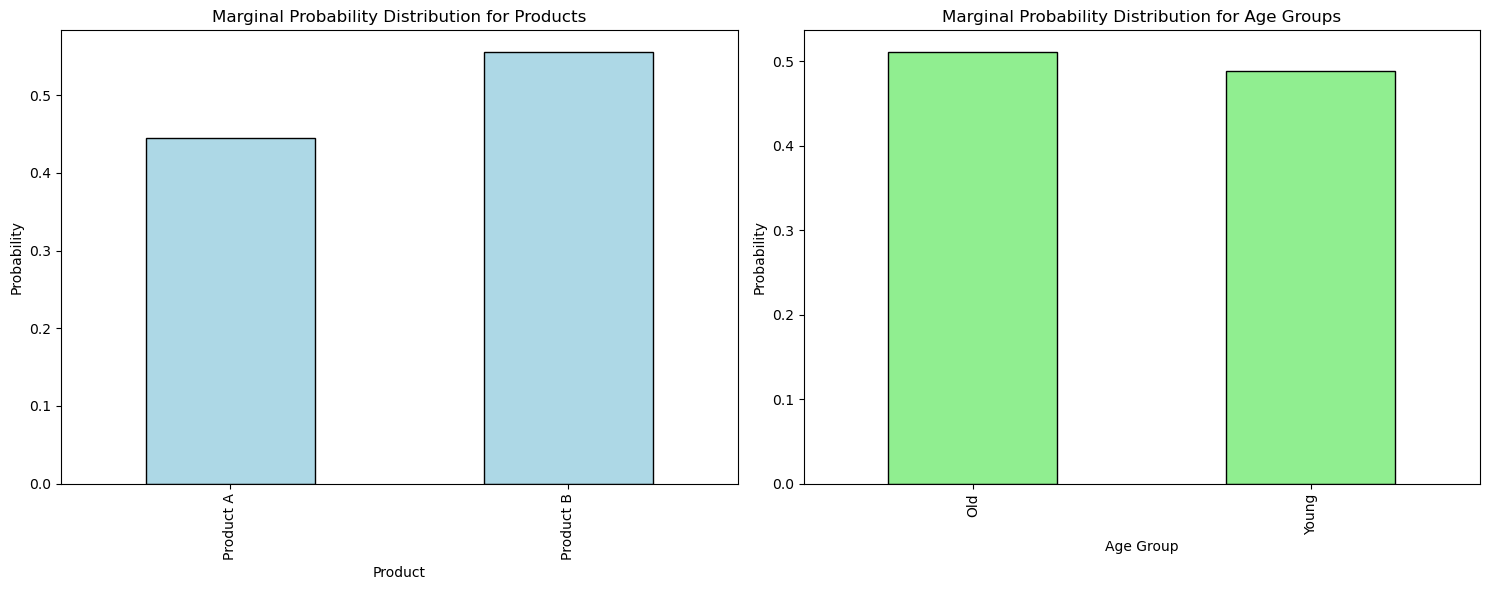

In [34]:
# Plotting the marginal probabilities
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# For products
marginal_product.plot(kind='bar', ax=axes[0], color='lightblue', edgecolor='black')
axes[0].set_title('Marginal Probability Distribution for Products')
axes[0].set_ylabel('Probability')
axes[0].set_xlabel('Product')

# For age groups
marginal_age.plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Marginal Probability Distribution for Age Groups')
axes[1].set_ylabel('Probability')
axes[1].set_xlabel('Age Group')

plt.tight_layout()
plt.show()


#### Exercise 12 Understanding Joint Density Function

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
np.random.seed(0)

# Generating sample data
ages = np.random.normal(35, 10, 1000).astype(int)
expenditures = np.random.normal(500, 100, 1000) + (ages - 35) * 5

df = pd.DataFrame({'Age': ages, 'Expenditure': expenditures})
df.head()


,Age,Expenditure
0,52,640.596268
1,39,609.247389
2,44,502.768518
3,57,620.471403
4,53,612.805333


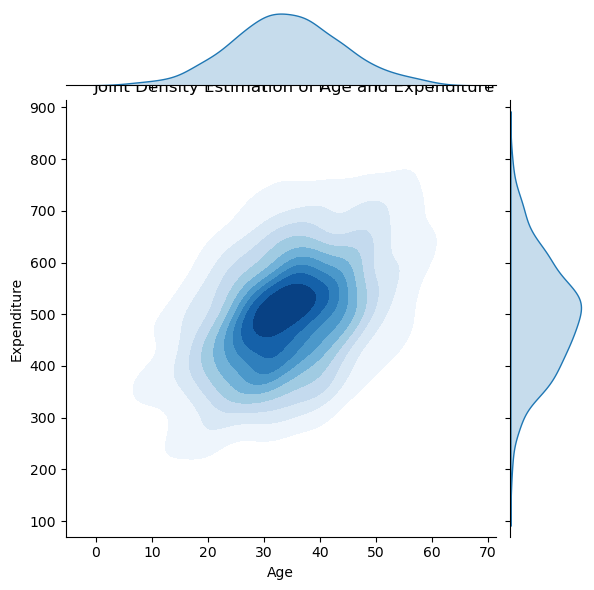

In [37]:
# Estimating joint density using KDE
sns.jointplot(x='Age', y='Expenditure', data=df, kind='kde', cmap='Blues', fill=True)
plt.title('Joint Density Estimation of Age and Expenditure', loc='right')
plt.show()


#### Exercise 13 Understanding Variance through Dice Rolling

In [38]:
import numpy as np
import matplotlib.pyplot as plt


In [39]:
np.random.seed(0)

# Number of simulations
n_simulations = 10000

# Simulating dice rolls
rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_simulations)


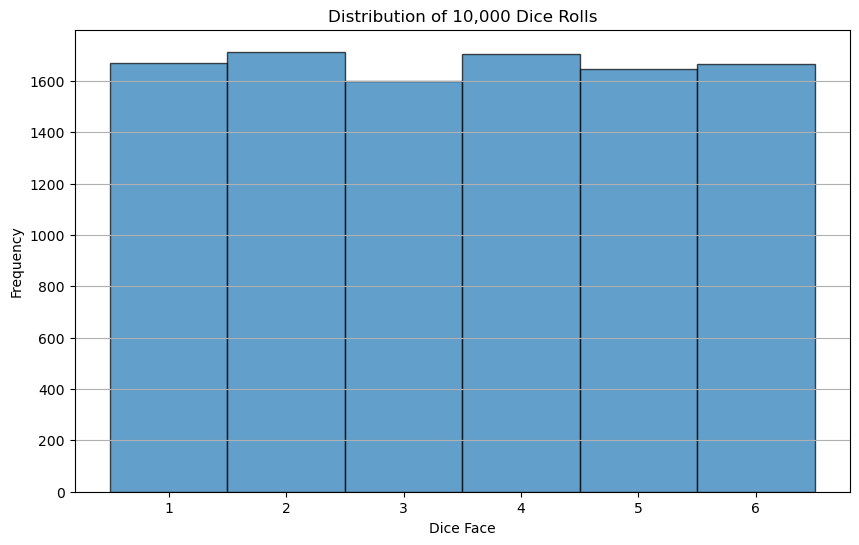

In [40]:
# Plotting the outcomes
plt.figure(figsize=(10, 6))
plt.hist(rolls, bins=np.arange(1, 8) - 0.5, edgecolor='black', alpha=0.7, align='mid')
plt.xticks([1, 2, 3, 4, 5, 6])
plt.xlabel('Dice Face')
plt.ylabel('Frequency')
plt.title('Distribution of 10,000 Dice Rolls')
plt.grid(axis='y')
plt.show()


In [41]:
# Calculating variance
variance = np.var(rolls)
variance


2.92216279

#### Exercise 14 Understanding Co-variance

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [43]:
np.random.seed(0)

# Generating sample data
hours_studied = np.random.normal(5, 2, 100)  # Students study between 1 to 9 hours, on average 5 hours
exam_scores = 50 + 10 * hours_studied + np.random.normal(0, 5, 100)  # Base score is 50, with 10 points for each hour studied

df = pd.DataFrame({'Hours_Studied': hours_studied, 'Exam_Scores': exam_scores})
df.head()


,Hours_Studied,Exam_Scores
0,8.528105,144.696800
1,5.800314,101.264349
2,6.957476,113.222335
3,9.481786,149.664848
4,8.735116,131.485543


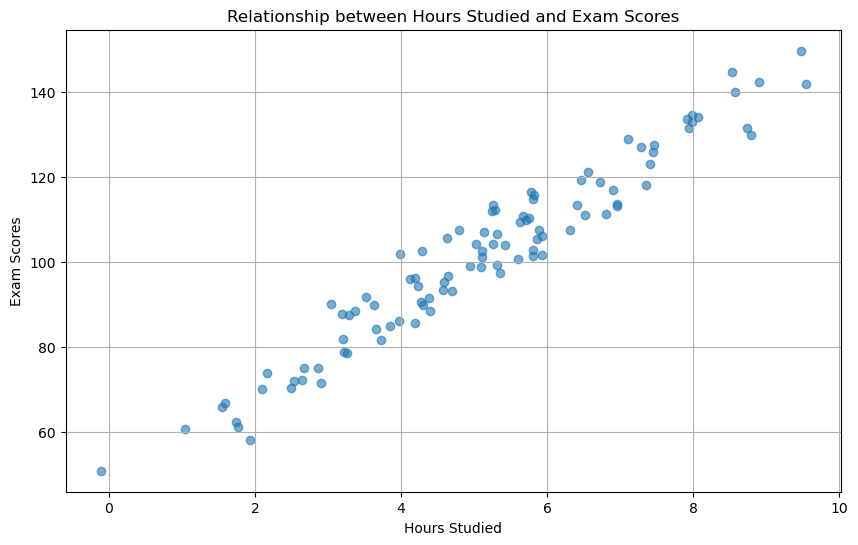

In [44]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Studied'], df['Exam_Scores'], alpha=0.6)
plt.title('Relationship between Hours Studied and Exam Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.grid(True)
plt.show()


In [45]:
# Calculating co-variance
covariance_matrix = np.cov(df['Hours_Studied'], df['Exam_Scores'])
covariance = covariance_matrix[0, 1]
covariance


42.220406048872675

#### Exercise 15 Understanding Correlation

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [47]:
np.random.seed(0)

# Generating sample data
exercise_duration = np.random.normal(1.5, 0.5, 200)  # Individuals exercise between 0.5 to 2.5 hours, on average 1.5 hours
energy_levels = 5 + 2 * exercise_duration + np.random.normal(0, 1, 200)  # Base energy level is 5, with 2 points for each hour of exercise

df = pd.DataFrame({'Exercise_Duration': exercise_duration, 'Energy_Levels': energy_levels})
df.head()


,Exercise_Duration,Energy_Levels
0,2.382026,9.394871
1,1.700079,8.160778
2,1.989369,10.078398
3,2.620447,10.896157
4,2.433779,10.507690


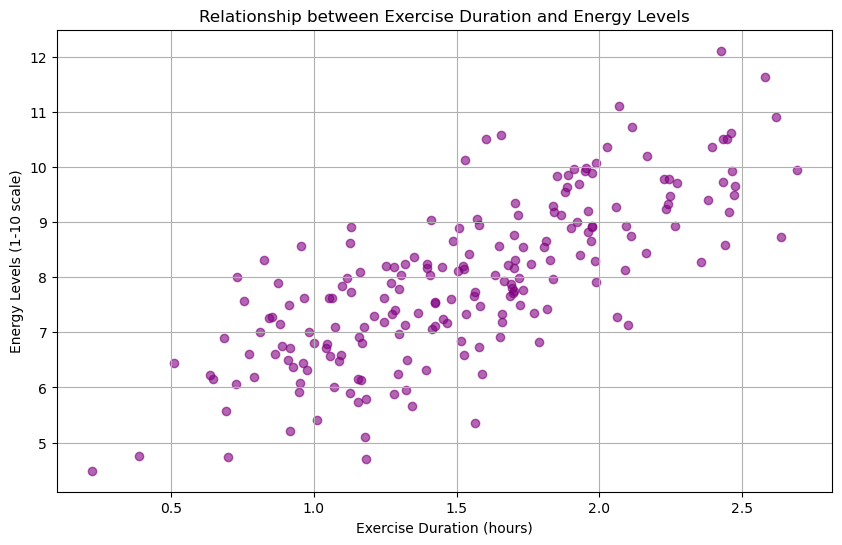

In [48]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Exercise_Duration'], df['Energy_Levels'], alpha=0.6, color='purple')
plt.title('Relationship between Exercise Duration and Energy Levels')
plt.xlabel('Exercise Duration (hours)')
plt.ylabel('Energy Levels (1-10 scale)')
plt.grid(True)
plt.show()


In [49]:
# Calculating correlation
correlation = df['Exercise_Duration'].corr(df['Energy_Levels'])
correlation


0.7579114556127933

#### Exercise 16 Understanding Causation 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [51]:
np.random.seed(0)

# Generating sample data
daily_dosage = np.random.normal(50, 10, 200)  # Dosage varies between 40 to 60 mg, on average 50 mg
immune_strength = 5 + 0.05 * daily_dosage + np.random.normal(0, 0.5, 200)  # Base strength is 5, with a slight increase for each mg of supplement

df = pd.DataFrame({'Daily_Dosage': daily_dosage, 'Immune_Strength': immune_strength})
df.head()


,Daily_Dosage,Immune_Strength
0,67.640523,8.197435
1,54.001572,7.580389
2,59.787380,8.539199
3,72.408932,8.948078
4,68.675580,8.753845


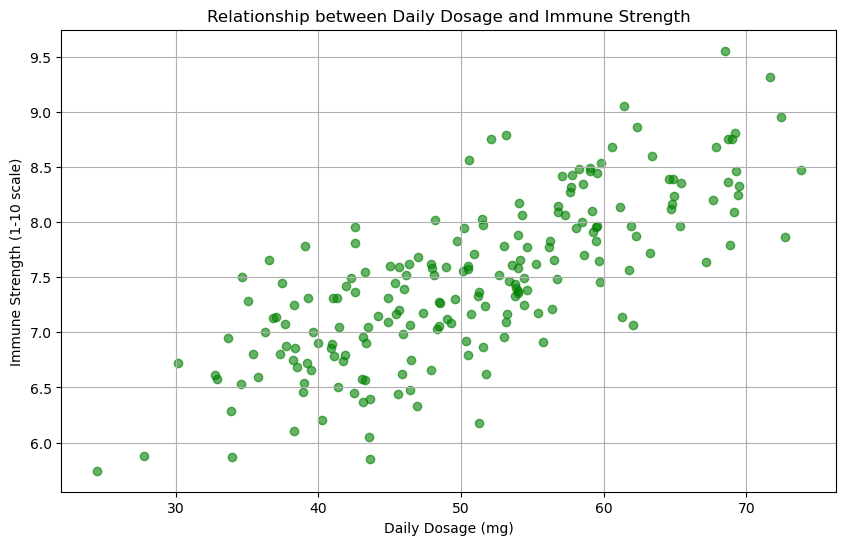

In [52]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Daily_Dosage'], df['Immune_Strength'], alpha=0.6, color='green')
plt.title('Relationship between Daily Dosage and Immune Strength')
plt.xlabel('Daily Dosage (mg)')
plt.ylabel('Immune Strength (1-10 scale)')
plt.grid(True)
plt.show()


In [53]:
# Adding a constant for the intercept term
X = sm.add_constant(df['Daily_Dosage'])
Y = df['Immune_Strength']

model = sm.OLS(Y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Immune_Strength   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     267.3
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.38e-38
Time:                        12:20:25   Log-Likelihood:                -132.90
No. Observations:                 200   AIC:                             269.8
Df Residuals:                     198   BIC:                             276.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.7590      0.169     28.117      0.000       4.425       5.093
Daily_Dosage     0.0535      0.003     16.348      0.000       0.047       0.060
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.008
Skew:                          -0.004   Prob(JB):                        0.996
Kurtosis:                       3.031   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

Revised Date: October 9, 2023